In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function #add compatibility

!pip install xlrd

In [2]:
df_can = pd.read_excel('Canada.xlsx', sheet_name = 'Canada by Citizenship', skiprows = range(20), skipfooter = 2)

In [3]:
#prepare dataset: delete col, remane the rest and reset index

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_continents = df_can.groupby('Continent', axis = 0).sum()

In [5]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [6]:
import matplotlib as mpl
%matplotlib inline 

import matplotlib.pyplot as plt

In [13]:
print(plt.style.available)
mpl.style.use('ggplot')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Pie Charts

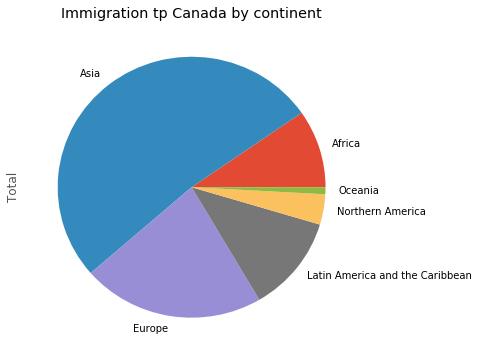

In [14]:
df_continents['Total'].plot(kind = 'pie', figsize=(6, 6))

plt.title('Immigration tp Canada by continent')

plt.show()

# Box Plot

In [16]:
years = list(map(int, range(1980, 2014)))

df_japan = df_can.loc['Japan', years].T
df_japan

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

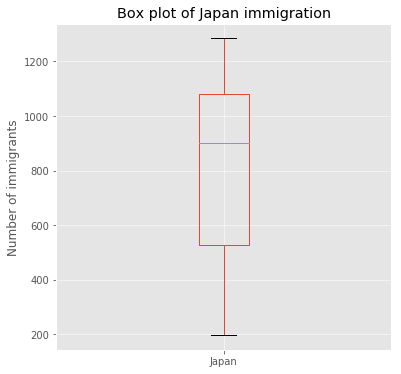

In [18]:
df_japan.plot(kind = 'box', figsize = (6,6))

plt.title('Box plot of Japan immigration')
plt.ylabel('Number of immigrants')

plt.show()

# Scatter Plot

In [104]:
df_total = df_can[years].T
df_total['total'] = df_total.sum(axis = 1)
df_total = df_total.loc[:,['total']]

df_total.index.name = 'year'
df_total.reset_index(inplace = True)
df_total

Country,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


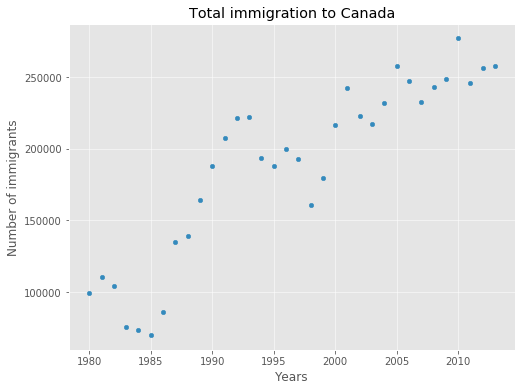

In [107]:
df_total.plot(kind = 'scatter', x = 'year',  y = 'total', figsize = (8,6))

plt.title('Total immigration to Canada')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

In [74]:
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


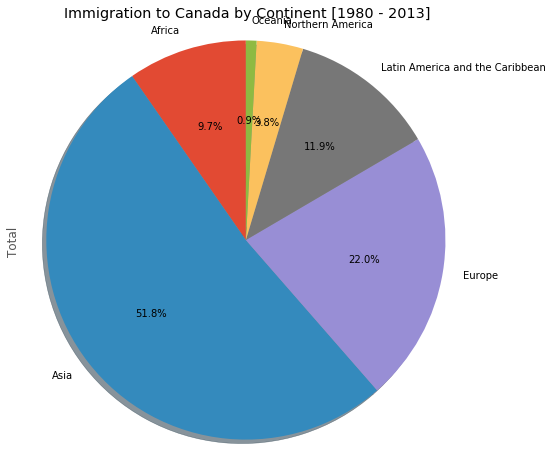

In [72]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(8, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

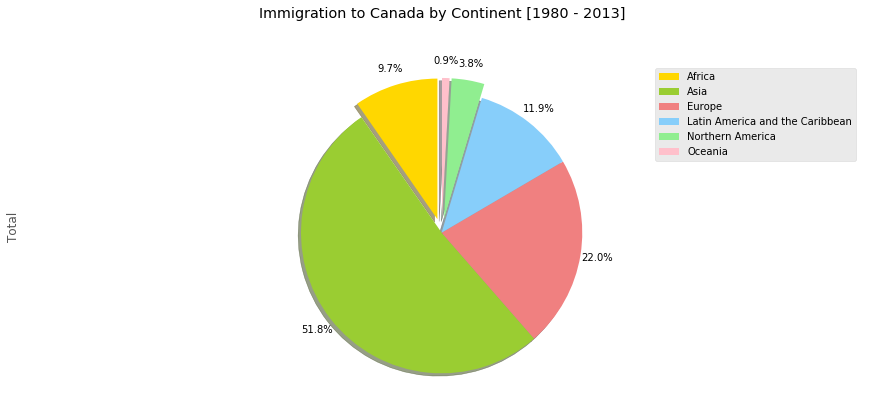

In [77]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper right') 

plt.show()

# Box Plot 2

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [82]:
df_CI= df_can.loc[['China', 'India'], years].T 
print(df_CI.head())
df_CI.describe().round(2)

Country  China  India
1980      5123   8880
1981      6682   8670
1982      3308   8147
1983      1863   7338
1984      1527   5704


Country,China,India
count,34.00,34.00
mean,19410.65,20350.12
std,13568.23,10007.34
min,1527.00,4211.00
25%,5512.75,10637.75
50%,19945.00,20235.00
75%,31568.50,28699.50
max,42584.00,36210.00


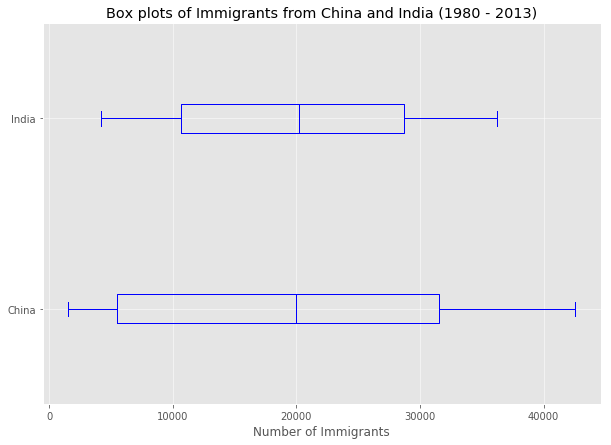

In [84]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False) #vert keyword to create a horizontal box

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

# Subpllots

With subplots, we usually work with the artist layer instead of the scripting layer.

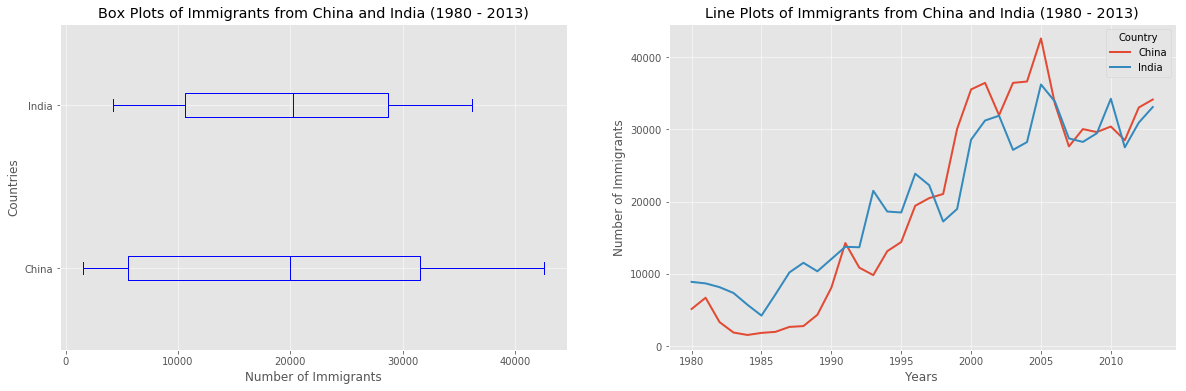

In [87]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot.
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). when <10 then 122=1,2,2

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [88]:
# 1. get the top 15 countries based on Total immigrant population
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [91]:
# 2. create a new dataframe which contains the aggregate for each decade

# let us get a list of all years in decades 80's and 90's
years_80s = list(map(int, range(1980, 1990))) 
years_90s = list(map(int, range(1990, 2000))) 
years_00s = list(map(int, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the two series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

print(new_df)
new_df.describe().round(2)

                                                     1980s   1990s   2000s
Country                                                                   
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413
Philippines                                          60764  138482  172904
Pakistan                                             10591   65302  127598
United States of America                             76824   56915   75173
Iran (Islamic Republic of)                           21477   54871   65794
Sri Lanka                                            14796   70421   49678
Republic of Korea                                    16259   38189   68183
Poland                                               57602   64864   13629
Lebanon                                              24918   49245   30906
France                   

,1980s,1990s,2000s
count,15.00,15.00,15.00
mean,44418.33,85594.67,97471.53
std,44190.68,68237.56,100583.20
min,7613.00,30028.00,13629.00
25%,16698.00,39259.00,36101.50
50%,30638.00,56915.00,65794.00
75%,59183.00,104451.50,105505.50
max,179171.00,261966.00,340385.00


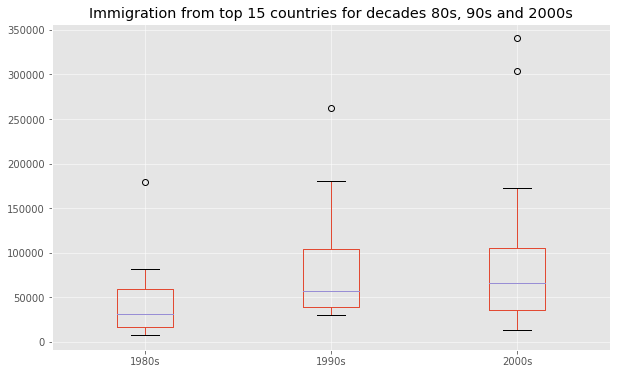

In [92]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [93]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


# Scatter Plots

Using a scatter plot, visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [94]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


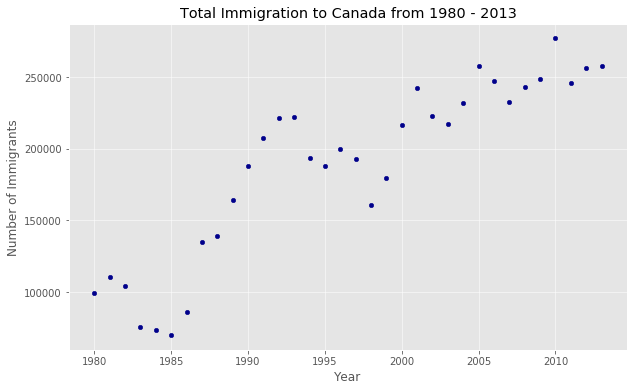

In [95]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Question: Plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

In [96]:
x = df_tot.year      # year on x-axis
y = df_tot.total     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.

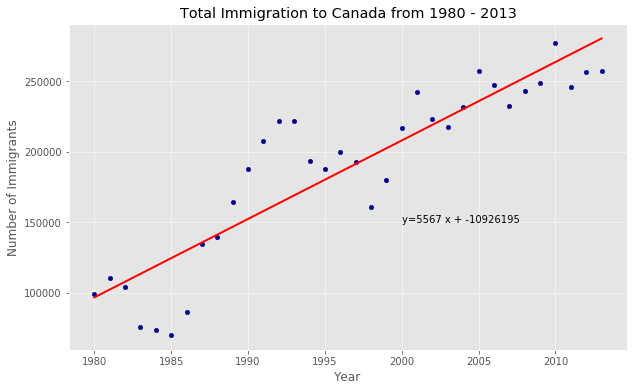

'No. Immigrants = 5567 * Year + -10926195'

In [97]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x,fit[0]*x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000)) #text for equation

plt.show()

# Print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

# Bubble Plots

Plot a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. Set the weights for the bubble as the normalized value of the population for each year.

In [98]:
df_can_t=df_can[years].T # transposed dataframe

# cast the Years (the index) to type float
df_can_t.index = map(float,df_can_t.index)

# let us label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace = True)

# view the changes
df_can_t.head(3)

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980.0,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981.0,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982.0,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102


In [110]:
norm_brazil = (df_can_t.Brazil - df_can_t.Brazil.min()) / (df_can_t.Brazil.max() - df_can_t.Brazil.min())
norm_argentina = (df_can_t.Argentina - df_can_t.Argentina.min()) / (df_can_t.Argentina.max() - df_can_t.Argentina.min())

norm_brazil.head()

0    0.032820
1    0.036467
2    0.025122
3    0.003647
4    0.006078
Name: Brazil, dtype: float64

We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
multiply weights by 2000 to scale it up on the graph, and,
add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

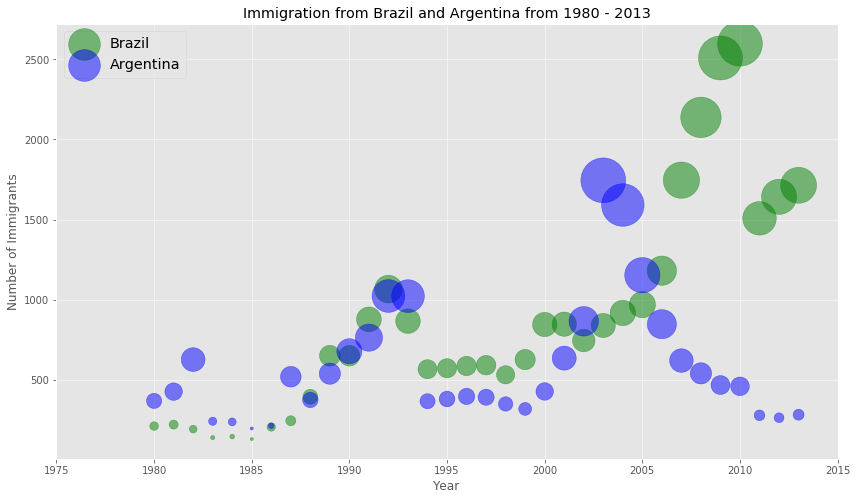

In [109]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')